In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter('ignore')
plt.style.use('dark_background')
from sklearn.metrics import mean_squared_error as mse

In [2]:
data = pd.read_csv('churn_prediction_simple.csv')
data

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22062,30295,2041,42,0,0.0,0,146.0,2,286,57.0,...,6777.41,8082.48,3515.03,0.51,90.10,1103.20,1183.04,7956.03,7431.36,0
22063,30297,1845,10,1,0.0,3,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
22064,30298,4919,34,1,0.0,0,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
22065,30299,297,47,0,0.0,2,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1


In [3]:
#seprating the dependent and independent variable
X = data.drop(columns = ['churn', 'customer_id'])
Y = data['churn']

In [4]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_x = scaler.fit_transform(X)

In [5]:
#splitting the dataset
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(scaler_x, Y, train_size = 0.80, stratify = Y, random_state = 101)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

# Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier as RFC
classifier = RFC()
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [7]:
pred_values = classifier.predict(x_train)
from sklearn.metrics import classification_report
print(classification_report(y_train, pred_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14234
           1       1.00      1.00      1.00      3419

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653



In [8]:
pred_values = classifier.predict(x_test)
print(classification_report(y_test, pred_values))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3559
           1       0.71      0.46      0.56       855

    accuracy                           0.86      4414
   macro avg       0.80      0.71      0.74      4414
weighted avg       0.85      0.86      0.85      4414



# Hyperparameters Tuning

In [9]:
from sklearn.metrics import f1_score
def cal_score(model, x1, y1, x2, y2):
    model.fit(x1, y1)
    
    predict = model.predict(x1)
    f1 = f1_score(y1, predict)
    
    predict = model.predict(x2)
    f2 = f1_score(y2, predict)
    return f1, f2

In [10]:
def effect(train_score, test_score, x_axis, title):
    plt.figure(figsize = (5,5), dpi = 120)
    plt.plot(x_axis, train_score, color = 'red', label = 'train score')
    plt.plot(x_axis, test_score, color = 'blue', label = 'test score')
    plt.legend()
    plt.xlabel('parameter value')
    plt.ylabel('f1 score')
    plt.title(title)
    plt.show()

In [11]:
classifier = RFC()
classifier.fit(x_train, y_train)

RandomForestClassifier()

# 1. n_estimators

In [12]:
estimators = [i for i in range(1, 600, 10)]
train = []
test = []

for i in estimators:
    model = RFC(class_weight= 'balanced_subsample',
                    n_estimators = i, 
                    n_jobs = -1,
                    max_depth = 7,
                    random_state = 101)
    f1, f2 = cal_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

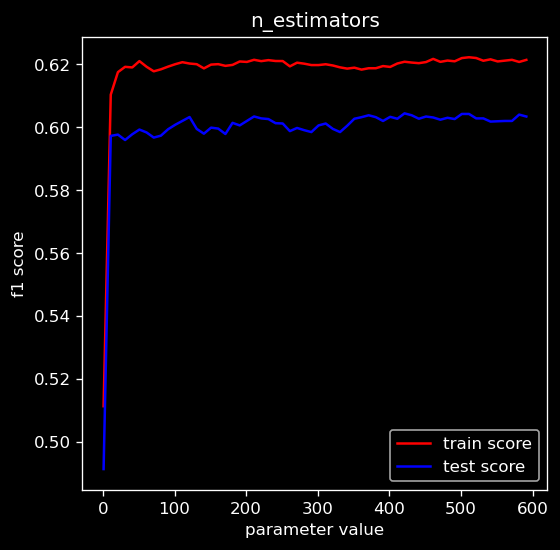

In [13]:
effect(train, test, range(1, 600, 10), 'n_estimators')

# 2. max_samples

In [16]:
maxsamples = [i/1000 for i in range(1, 1000)]
train = []
test = []

for i in maxsamples:
    model = RFC(class_weight= 'balanced_subsample',
                    n_estimators = 50, 
                    n_jobs = -1,
                    max_depth = 7,
                    random_state = 101, max_samples = i)
    f1, f2 = cal_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

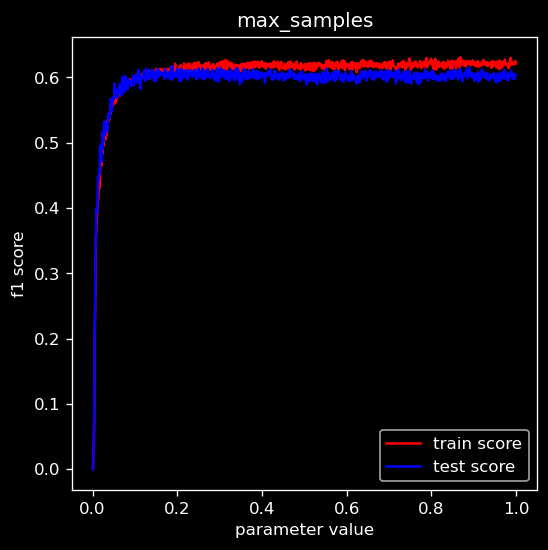

In [17]:
effect(train, test, maxsamples, 'max_samples')

# 3. max_features

In [18]:
maxfeatures = range(1, X.shape[1])
train = []
test = []

for i in maxfeatures:
    model = RFC(class_weight= 'balanced_subsample',
                    n_estimators = 50, 
                    n_jobs = -1,
                    max_depth = 7,
                    random_state = 101, max_features = i)
    f1, f2 = cal_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

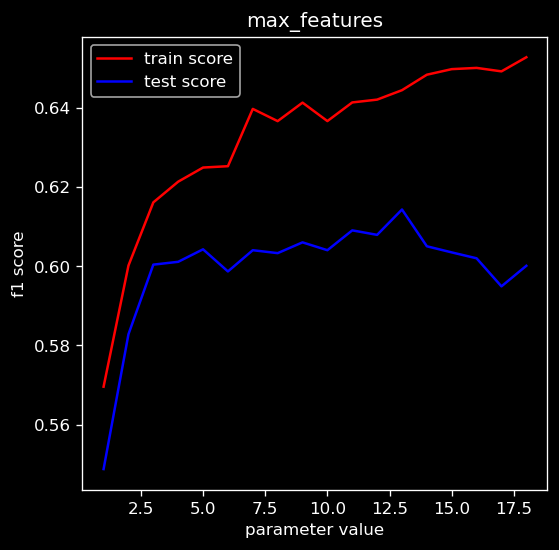

In [19]:
effect(train, test, maxfeatures, 'max_features')